In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cust = pd.read_csv('Customers.csv')
prod = pd.read_csv('Products.csv')
trans = pd.read_csv('Transactions.csv')

In [4]:
cust.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
cust['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [9]:
prod['Category'].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [11]:
# Merge 'cust' and 'trans' on 'cust_id'
cust_trans = pd.merge(cust, trans, on='CustomerID')

# Merge 'cust_trans' and 'prod' on 'prod_id'
all_data = pd.merge(cust_trans, prod, on='ProductID')

In [12]:
all_data

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,433.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,HomeSense T-Shirt,Clothing,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,ActiveWear Smartphone,Electronics,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,HomeSense Desk Lamp,Home Decor,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,TechPro Cookbook,Books,416.40


In [26]:
print("Data Types and Missing Values in Customers Dataset:")
print(cust.info())
print(cust.isnull().sum())

Data Types and Missing Values in Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       200 non-null    object        
 1   CustomerName     200 non-null    object        
 2   Region           200 non-null    object        
 3   SignupDate       200 non-null    datetime64[ns]
 4   SignupYearMonth  200 non-null    period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 7.9+ KB
None
CustomerID         0
CustomerName       0
Region             0
SignupDate         0
SignupYearMonth    0
dtype: int64


In [27]:
unique_customers = cust['CustomerID'].nunique()
print(f"Total Unique Customers: {unique_customers}")

Total Unique Customers: 200


In [28]:
region_distribution = cust['Region'].value_counts()
print("Customer Distribution by Region:")
print(region_distribution)

Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


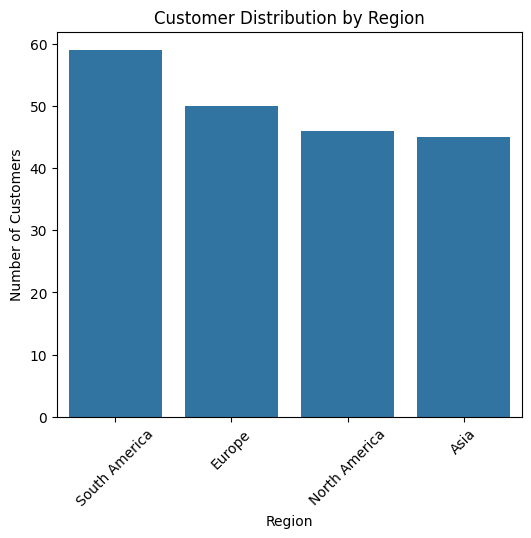

In [30]:
plt.figure(figsize=(6, 5))
sns.countplot(data=cust, x='Region', order=region_distribution.index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Calculate total spending per customer
customer_spending = all_data.groupby(['CustomerID', 'Region'])['Price_y'].sum().reset_index()

In [18]:
avg_spending_region = customer_spending.groupby('Region')['Price_y'].mean().reset_index()

In [19]:
avg_spending_region

,Region,Price_y
0,Asia,1344.091591
1,Europe,1289.663000
2,North America,1406.936304
3,South America,1427.318983


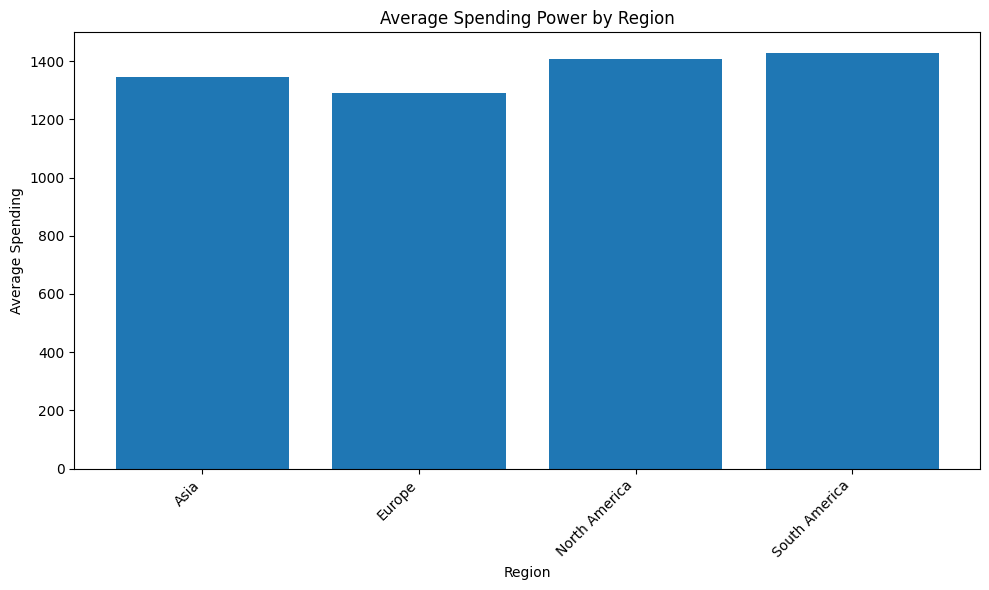

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(avg_spending_region['Region'], avg_spending_region['Price_y'])
plt.xlabel("Region")
plt.ylabel("Average Spending")
plt.title("Average Spending Power by Region")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
avg_spending_region_category = all_data.groupby(['Region', 'Category'])['Price_y'].mean().reset_index()

In [23]:
avg_spending_region_category

,Region,Category,Price_y
0,Asia,Books,267.444902
1,Asia,Clothing,296.567241
2,Asia,Electronics,281.887719
3,Asia,Home Decor,235.227692
4,Europe,Books,289.963906
5,Europe,Clothing,300.803404
6,Europe,Electronics,277.426034
7,Europe,Home Decor,241.492154
8,North America,Books,279.003692
9,North America,Clothing,271.272667


In [32]:
# Calculate total spending per region and category
total_spending_region_category = all_data.groupby(['Region', 'Category'])['Price_y'].sum().reset_index()

In [33]:
total_spending_region_category

,Region,Category,Price_y
0,Asia,Books,13639.69
1,Asia,Clothing,17200.90
2,Asia,Electronics,16067.60
3,Asia,Home Decor,12231.84
4,Europe,Books,18557.69
5,Europe,Clothing,14137.76
6,Europe,Electronics,16090.71
7,Europe,Home Decor,15696.99
8,North America,Books,18135.24
9,North America,Clothing,16276.36


In [36]:
# Calculate number of customers per region and category
customer_count_region_category = all_data.groupby(['Region', 'Category'])['CustomerID'].nunique().reset_index()

# Calculate number of orders per region and category
order_count_region_category = all_data.groupby(['Region', 'Category'])['TransactionID'].nunique().reset_index()

In [37]:
order_count_region_category

,Region,Category,TransactionID
0,Asia,Books,51
1,Asia,Clothing,58
2,Asia,Electronics,57
3,Asia,Home Decor,52
4,Europe,Books,64
5,Europe,Clothing,47
6,Europe,Electronics,58
7,Europe,Home Decor,65
8,North America,Books,65
9,North America,Clothing,60
